# Tutorial 7: Kinked Chromatin

In all tutorials so far, we have modeled chromatin such that each nucleosome behaves as a point in space along a stretchable, shearable wormlike chain. The simulations have neglected the geometry of DNA wrapping around each nucleosome, which introduces kinks in the path of the chromatin fiber. This tutorial introduces the idea of twist and DNA wrapping. The natural twist of DNA and the wrapping DNA around each nucleosome introduces kinks in the path of the chromatin fiber. This geometric feature is discussed with more detail in [Beltran et al. _PRL_ (2019)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.123.208103). Descriptions in this notebook will focus on differences associated with this more detailed representation of chromatin.

#### Important Consideration

Equilibrating a kinked wormlike chain with long-range reader protein interactions is computationally challenging project. While the simulation may run, it is prone to frustration and is highly sensitive to the equilibration of the polymer. For that reason, use of this simulation so far to model the kinked wormlike chain has been limited to **homopolymers** (see [Wakim and Spakowitz _PNAS_ (2024)](https://www.pnas.org/doi/10.1073/pnas.2317911121) for details). This demonstration follows that example, bringing back the `NullField` from `tutorial_1` and neglecting epigenetic marks and reader proteins. In this demonstration, we ignore steric clashes between nucleosomes. In a later example, we will include steric clashes.

#### Import Modules

In previous tutorials, we have used the `Chromatin` class in the `polymers` module to generate an approximate representation of the chromatin fiber. The class neglects the geometry of DNA wrapping around each nucleosome and kinks in the path of the chromatin fiber that form as a result. In this tutorial, we will introduce kinks in the path of the chromatin fiber. To do so, we will use the `DetailedChromatin` class in the `polymers` module. We will instantiate the chromatin fiber as a straight line and will demonstrate that the polymer equilibrates to a kinked configuration.

In [1]:
# Built-in modules
import os
import sys

# Third-party modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Custom modules
from chromo.binders import get_by_name, make_binder_collection
from chromo.polymers import DetailedChromatin    # This class captures DNA wrapping
from chromo.fields import NullField
import chromo.mc as mc
import chromo.mc.mc_controller as ctrl
from chromo.util.reproducibility import get_unique_subfolder_name

#### Specify Binders

We will use the DetailedNucleosome class to model a homopolymer, as in [Wakim and Spakowitz _PNAS_ (2024)](https://www.pnas.org/doi/10.1073/pnas.2317911121). Therefore, like `tutorial_1`, we will use a `null_reader` as a placeholder for the binder.

In [2]:
# Initialize a null binder to serve as a placeholder
null_binder = get_by_name("null_reader")

# Create a binder collection (required to run a simulation)
binder_collection = make_binder_collection([null_binder])

#### Instantiate the Polymer

We will instantiate the chromatin fiber along a straight line. We will model a shorter chromatin fiber than previous tutorials for computational efficiency. Since we are incorporating nucleosome geometry and twist, we need to specify how many base pairs of DNA wrap around each nucleosome and what the twist persistence length is when we instantiate the polymer.

In [3]:
# Specify the number of beads along the chromatin fiber
num_beads = 100

# Specify the spacing between adjacent beads
bead_spacing = np.ones(num_beads - 1) * 16.5

# Specify the geometry of DNA wrapping around the nucleosome
length_bp = 0.332
bp_wrap = 147.

# Specify the bending and twist persistence lengths
lp = 50
lt = 100

In [4]:
poly = DetailedChromatin.straight_line_in_x(
    "Chr",
    bead_spacing,
    bp_wrap=bp_wrap,
    lp=lp,
    lt=lt
)

No states defined.
No chemical modifications defined.


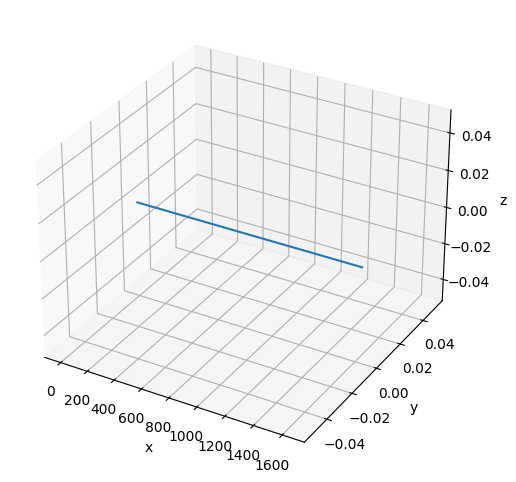

In [5]:
# Plot the initial configuration of the polymer
x = poly.r[:, 0]
y = poly.r[:, 1]
z = poly.r[:, 2]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.plot3D(np.asarray(x), np.asarray(y), np.asarray(z))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

#### Instantiate the Null Field

In [6]:
# The field contains the polymer
field = NullField(polymers=[poly])

#### Specify the Simulation Parameters

This setup is described in `tutorial_1`.

In [7]:
amp_bead_bounds, amp_move_bounds = mc.get_amplitude_bounds(
    polymers = [poly]
)

In [8]:
out_dir = "output_demo"
latest_sim = get_unique_subfolder_name(f"{out_dir}/sim_")
moves_to_use = ctrl.all_moves_except_binding_state(
    log_dir=latest_sim,
    bead_amp_bounds=amp_bead_bounds.bounds,
    move_amp_bounds=amp_move_bounds.bounds,
    controller=ctrl.SimpleControl
)

In [9]:
# Specify the number of snapshots and the number of MC steps to attempt per snapshot
num_snapshots = 200
mc_steps_per_snapshot = 200  # Reduce the number of MC steps per snapshot to speed up the simulation
# TODO: If you want to run a more rigorous simulation, increase the number of MC steps per snapshot

#### Run the Simulation

In [10]:
polymers = mc.polymer_in_field(
    polymers = [poly],
    binders = binder_collection,
    field = field,
    num_save_mc = mc_steps_per_snapshot,
    num_saves = num_snapshots,
    bead_amp_bounds = amp_bead_bounds,
    move_amp_bounds = amp_move_bounds,
    output_dir = out_dir,
    mc_move_controllers = moves_to_use
)

Save point 0 completed
Save point 1 completed
Save point 2 completed
Save point 3 completed
Save point 4 completed
Save point 5 completed
Save point 6 completed
Save point 7 completed
Save point 8 completed
Save point 9 completed
Save point 10 completed
Save point 11 completed
Save point 12 completed
Save point 13 completed
Save point 14 completed
Save point 15 completed
Save point 16 completed
Save point 17 completed
Save point 18 completed
Save point 19 completed
Save point 20 completed
Save point 21 completed
Save point 22 completed
Save point 23 completed
Save point 24 completed
Save point 25 completed
Save point 26 completed
Save point 27 completed
Save point 28 completed
Save point 29 completed
Save point 30 completed
Save point 31 completed
Save point 32 completed
Save point 33 completed
Save point 34 completed
Save point 35 completed
Save point 36 completed
Save point 37 completed
Save point 38 completed
Save point 39 completed
Save point 40 completed
Save point 41 completed
Sa

#### Plot the Resulting Configuration

Notice that the path of the polymer is kinked at each nucleosome in its final configuration.

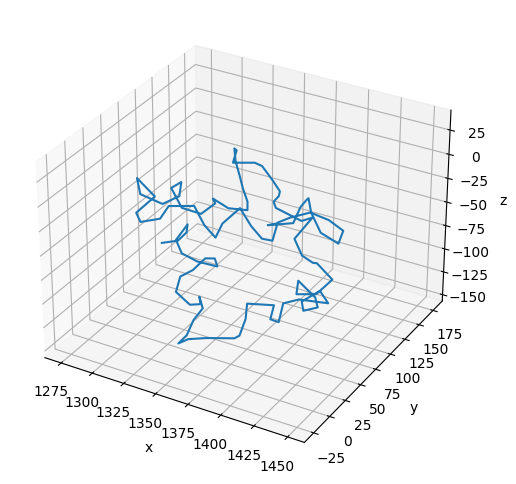

In [11]:
# Plot the final configuration of the polymer
x = polymers[0].r[:, 0]
y = polymers[0].r[:, 1]
z = polymers[0].r[:, 2]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.plot3D(np.asarray(x), np.asarray(y), np.asarray(z))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()